In [16]:
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
%matplotlib inline
import matplotlib as plt
import pandas as pd
plt.rcParams['figure.figsize'] = (12,6)
from cycler import cycler

In [2]:
# Analyze all books
books = PlaintextCorpusReader('bk/', '.*')

# Get the major characters
chars = ['narr', 'Adam', 'Eve', 'God', 'the_Son', 'Satan', 'Michael', 'Raphael']
someSpeakers = PlaintextCorpusReader('sp/', chars)

# Get all characters
allSpeakers = PlaintextCorpusReader('sp/', '.*')
allchars = allSpeakers.fileids()

In [3]:
speakerWordCounts = {char: len(allSpeakers.words(char)) for char in allSpeakers.fileids()}
bookWordCounts = {book: len(books.words(book)) for book in books.fileids()}

In [31]:
blacklist = ['rest', 'regal', 'region', 'reason', 'regent', 'prey', 'union', 'under', 'unction']

In [32]:
def makeCFD(corpus, words): 
    return nltk.ConditionalFreqDist(
           (target, fileid)
           for fileid in corpus.fileids()
           for w in corpus.words(fileid)
           for target in words
           if w.lower().startswith(target) and w.lower() not in blacklist)

In [33]:
words = ['dis', 'pre', 're', 'un', 'con']
someSpeakerCFD = makeCFD(someSpeakers, words)
allSpeakerCFD = makeCFD(allSpeakers, words)
bookCFD = makeCFD(books, words)

In [34]:
def normalizeCFD(cfd, counts): 
    # Adjust for each character's total words
    newcfd = cfd # make a copy
    for word in newcfd: 
        for char in newcfd[word]:
            newcfd[word][char] = newcfd[word][char] / counts[char]
    return newcfd

In [35]:
def plotCFD(corpus, words, normalize=True, wordCounts=False, filename=False):
    newCFD = makeCFD(corpus, words)
    if normalize: 
        normalized = normalizeCFD(newCFD, wordCounts)
    df = pd.DataFrame(newCFD).fillna(0)
    charlist = df.index.tolist()
    ax = df.plot()
    ax.set_xticks(range(len(charlist)))
    ax.set_xticklabels(charlist, rotation=90);
    if filename: 
        fig = ax.get_figure()
        fig.tight_layout()
        fig.savefig('macro-etym/' + filename + '.png') # save it to a file

words = ['dis', 'pre', 're', 'un', 'con']

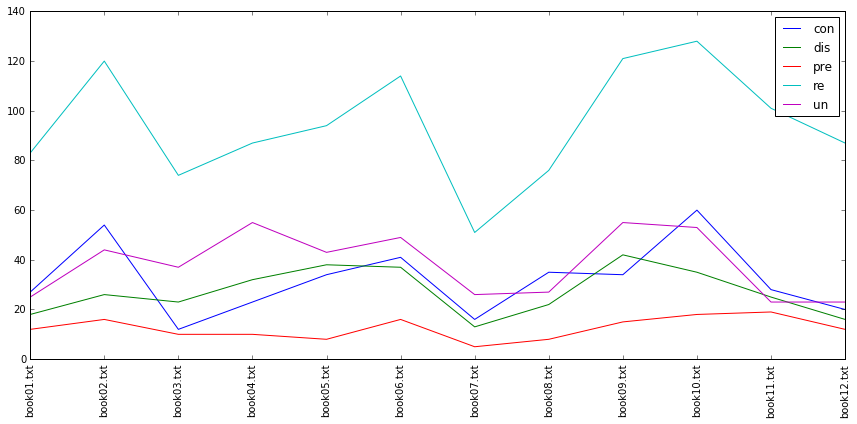

In [36]:
plotCFD(books, words, normalize=False, wordCounts=bookWordCounts, filename="prefixes-books-notnormalized")

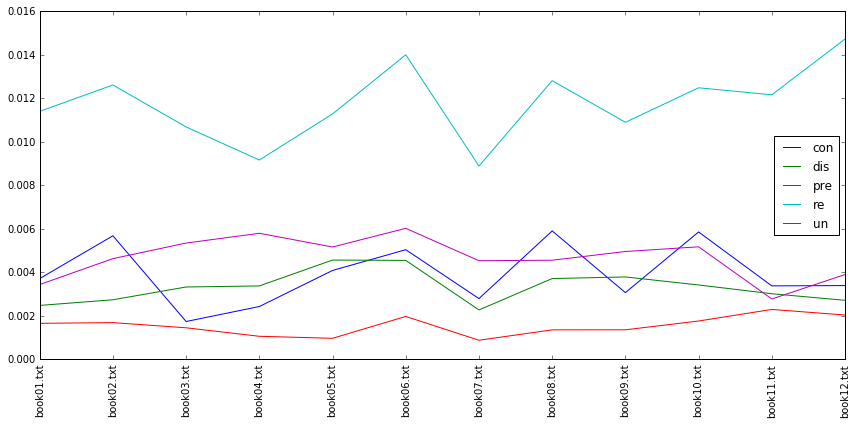

In [37]:
plotCFD(books, words, normalize=True, wordCounts=bookWordCounts, filename="prefixes-books-normalized")

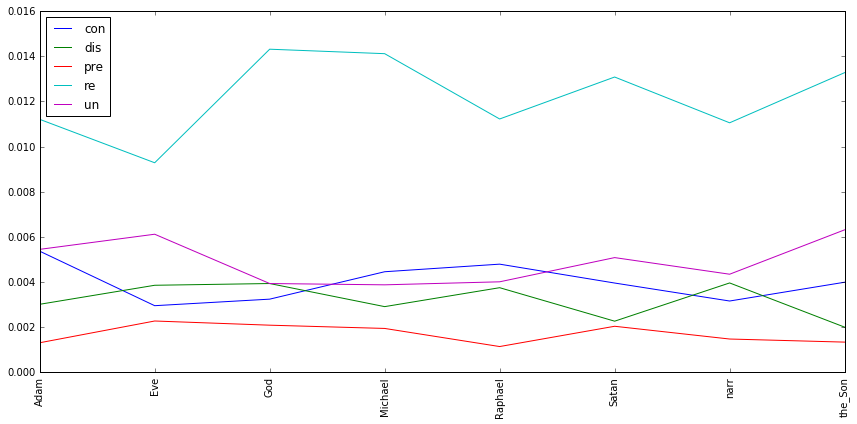

In [38]:
plotCFD(someSpeakers, words, normalize=True, wordCounts=speakerWordCounts, filename="prefixes-speakers-jknormalized")

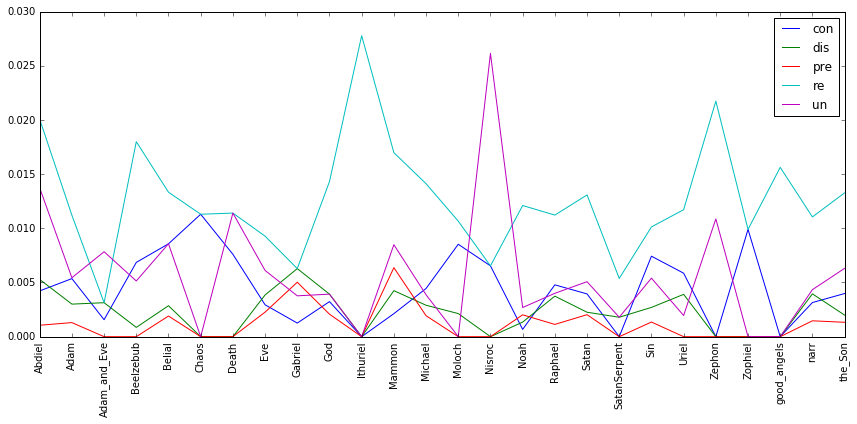

In [39]:
plotCFD(allSpeakers, words, normalize=True, wordCounts=speakerWordCounts, filename="prefixes-allspeakers-normalized")

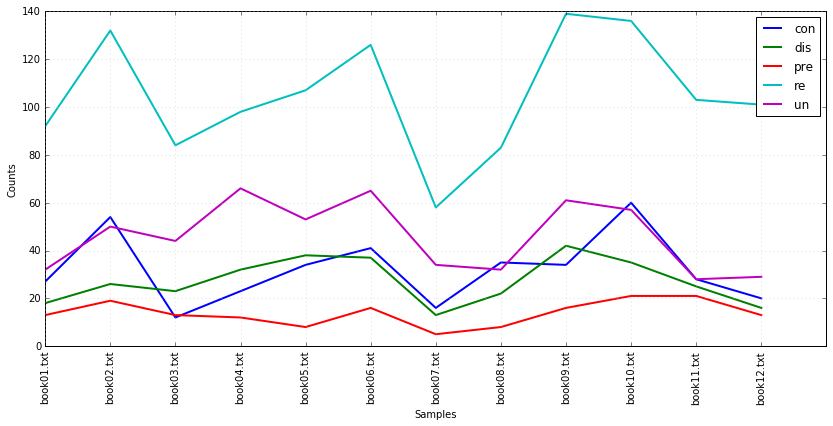

In [7]:
bookCFD.plot()

In [8]:
normalized = normalizeCFD(bookCFD, bookWordCounts)

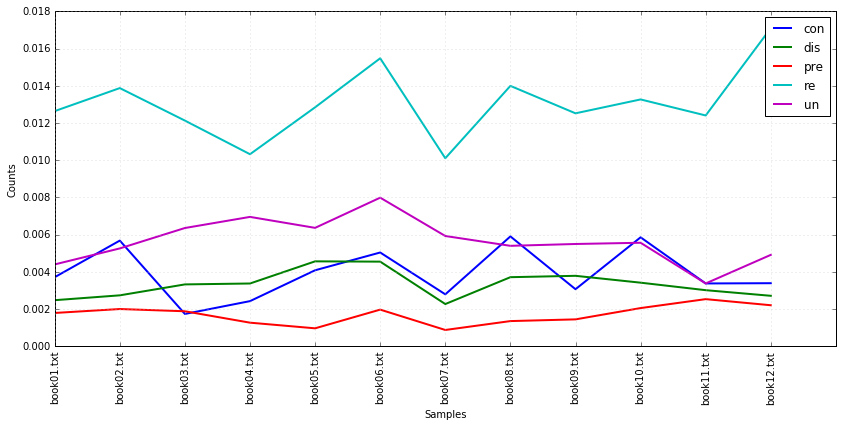

In [9]:
bookCFD.plot() # Normalized.

In [11]:
normalized = normalizeCFD(someSpeakerCFD, speakerWordCounts)

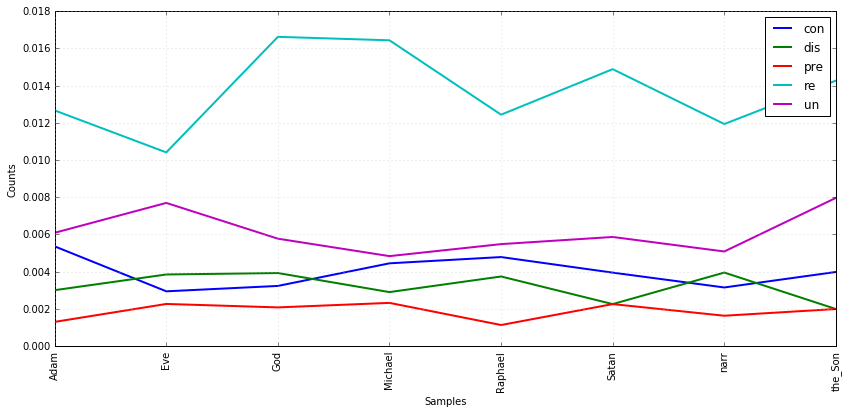

In [12]:
someSpeakerCFD.plot()

In [13]:
normalized = normalizeCFD(allSpeakerCFD, speakerWordCounts)

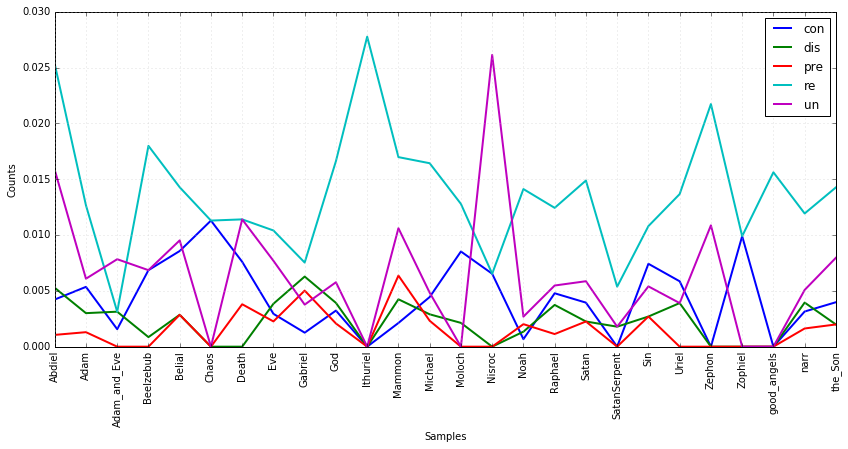

In [14]:
allSpeakerCFD.plot()

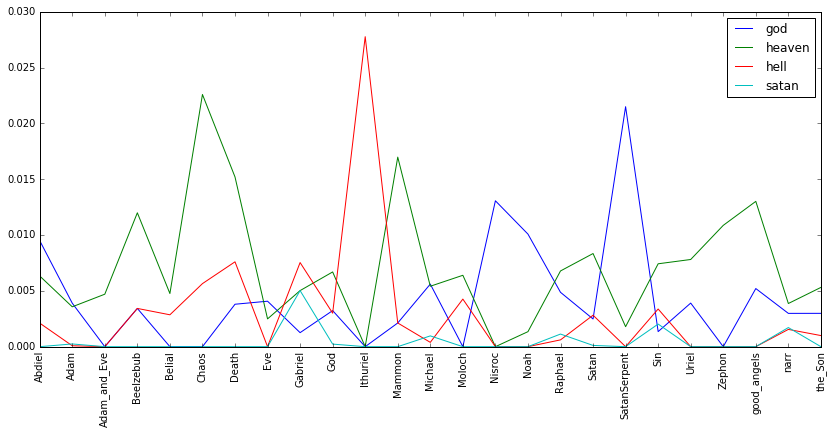

In [15]:
newwords = ['god', 'satan', 'heaven', 'hell']
newCFD = makeCFD(allSpeakers, newwords)
normalized = normalizeCFD(newCFD, speakerWordCounts)
df = pd.DataFrame(newCFD).fillna(0)
charlist = df.index.tolist()
ax = df.plot()
ax.set_xticks(range(len(charlist)))
ax.set_xticklabels(charlist, rotation=90);

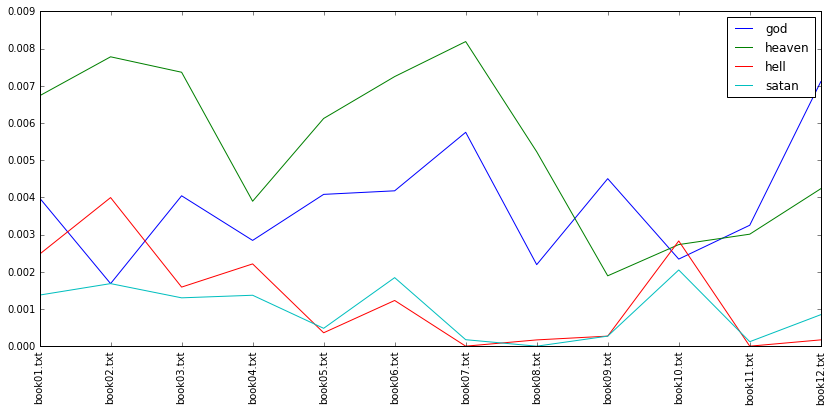

In [17]:
newwords = ['god', 'satan', 'heaven', 'hell']
newCFD = makeCFD(books, newwords)
normalized = normalizeCFD(newCFD, bookWordCounts)
df = pd.DataFrame(newCFD).fillna(0)
charlist = df.index.tolist()
ax = df.plot()
ax.set_xticks(range(len(charlist)))
ax.set_xticklabels(charlist, rotation=90);

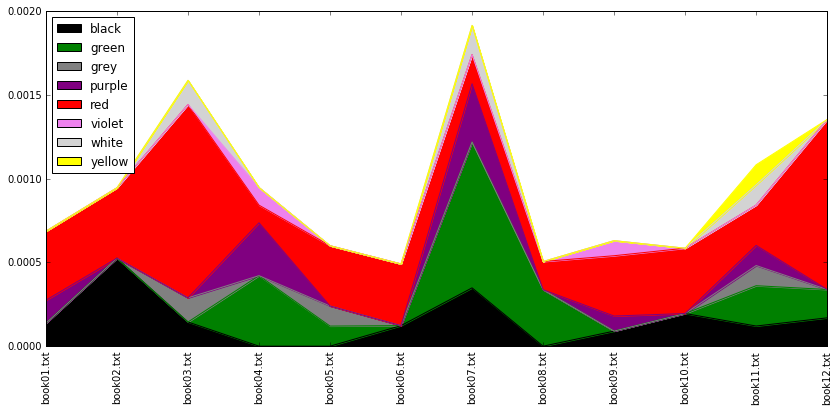

In [35]:
newwords = ['black', 'green', 'grey', 'purple', 'red', 'violet', 'white', 'yellow']
colorWords = ['black','green', 'grey', 'purple', 'red', 'violet', 'lightgrey', 'yellow']

newCFD = makeCFD(books, newwords)
normalized = normalizeCFD(newCFD, bookWordCounts)
df = pd.DataFrame(newCFD).fillna(0)
charlist = df.index.tolist()
ax = df.plot(color=colorWords, kind='area')
ax.set_xticks(range(len(charlist)))
ax.set_xticklabels(charlist, rotation=90);

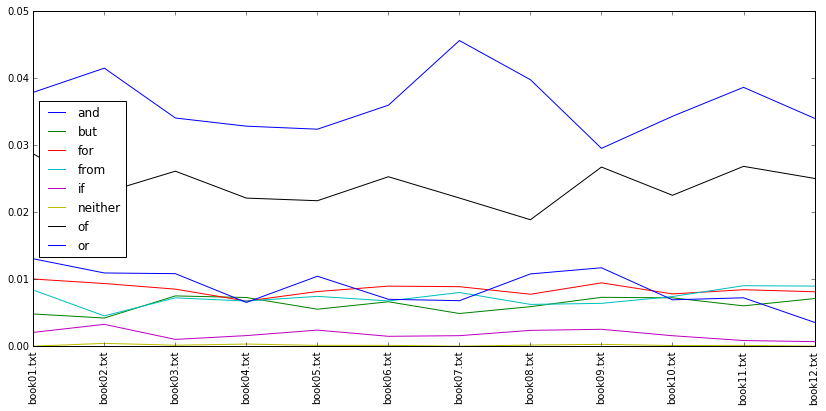

In [25]:
newwords = ['or', 'and', 'but', 'for', 'neither', 'if', 'of', 'from']
newCFD = makeCFD(books, newwords)
normalized = normalizeCFD(newCFD, bookWordCounts)
df = pd.DataFrame(newCFD).fillna(0)
charlist = df.index.tolist()
ax = df.plot()
ax.set_xticks(range(len(charlist)))
ax.set_xticklabels(charlist, rotation=90);

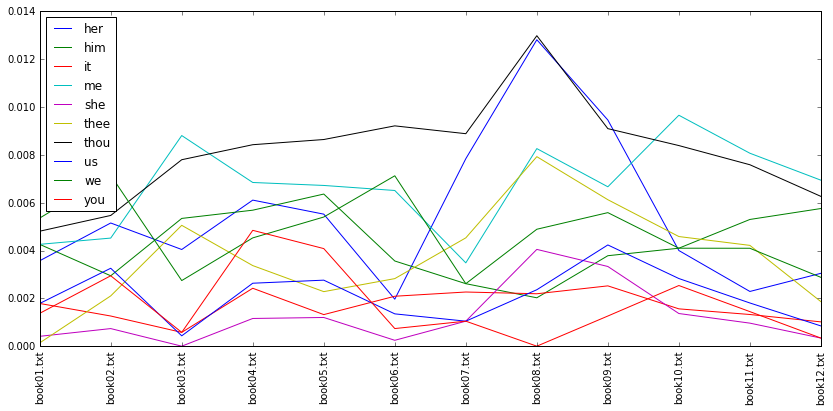

In [28]:
newwords = ['I', 'thou', 'you', 'we', 'she', 'it', 
           'me', 'thee', 'you', 'us', 'him', 'her']
newCFD = makeCFD(books, newwords)
normalized = normalizeCFD(newCFD, bookWordCounts)
df = pd.DataFrame(newCFD).fillna(0)
charlist = df.index.tolist()
ax = df.plot()
ax.set_xticks(range(len(charlist)))
ax.set_xticklabels(charlist, rotation=90);